In [ ]:
# Created: 20250104

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: py311; pyv: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


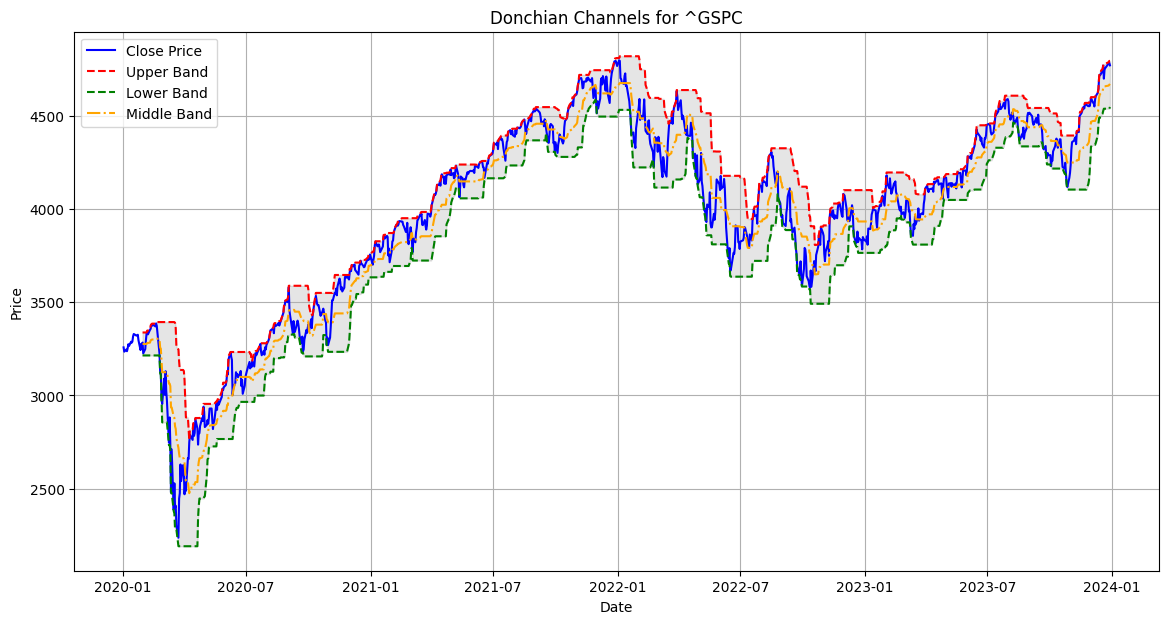

In [4]:
# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Donchian Channels
def donchian_channels(data, window=20):
    data['Upper Band'] = data['High'].rolling(window=window).max()
    data['Lower Band'] = data['Low'].rolling(window=window).min()
    data['Middle Band'] = (data['Upper Band'] + data['Lower Band']) / 2
    return data

# Apply Donchian Channel function
data = donchian_channels(data)

# Step 3: Plot the data with Donchian Channels
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.plot(data['Middle Band'], label='Middle Band', color='orange', linestyle='-.')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
plt.title(f'Donchian Channels for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()